In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
dataframe = pd.read_csv("ParisHousingData.csv")

In [3]:
dataframe.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
pd.isnull(dataframe).sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [6]:
dict = {}
for i in list(dataframe.columns):
  dict[i] = dataframe[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
squareMeters,9483
numberOfRooms,100
hasYard,2
hasPool,2
floors,100
cityCode,9509
cityPartRange,10
numPrevOwners,10
made,32
isNewBuilt,2


In [7]:
dataframe = shuffle(dataframe)
dataframe = dataframe.reset_index(drop=True)

In [8]:
print("Number of rows and columns in Data Set :", dataframe.shape)

Number of rows and columns in Data Set : (10000, 18)


In [9]:
dataframe['category'].value_counts()

Basic     7470
Luxury    2530
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

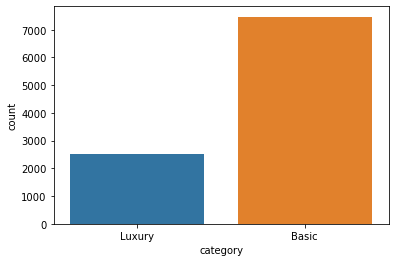

In [10]:
sns.countplot( x = dataframe['category'])

<AxesSubplot:ylabel='category'>

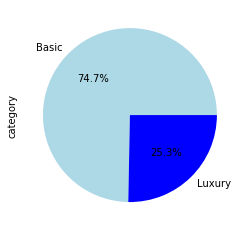

In [11]:
round(dataframe['category'].value_counts()/dataframe.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightblue', 'blue'])

<AxesSubplot:xlabel='numberOfRooms', ylabel='count'>

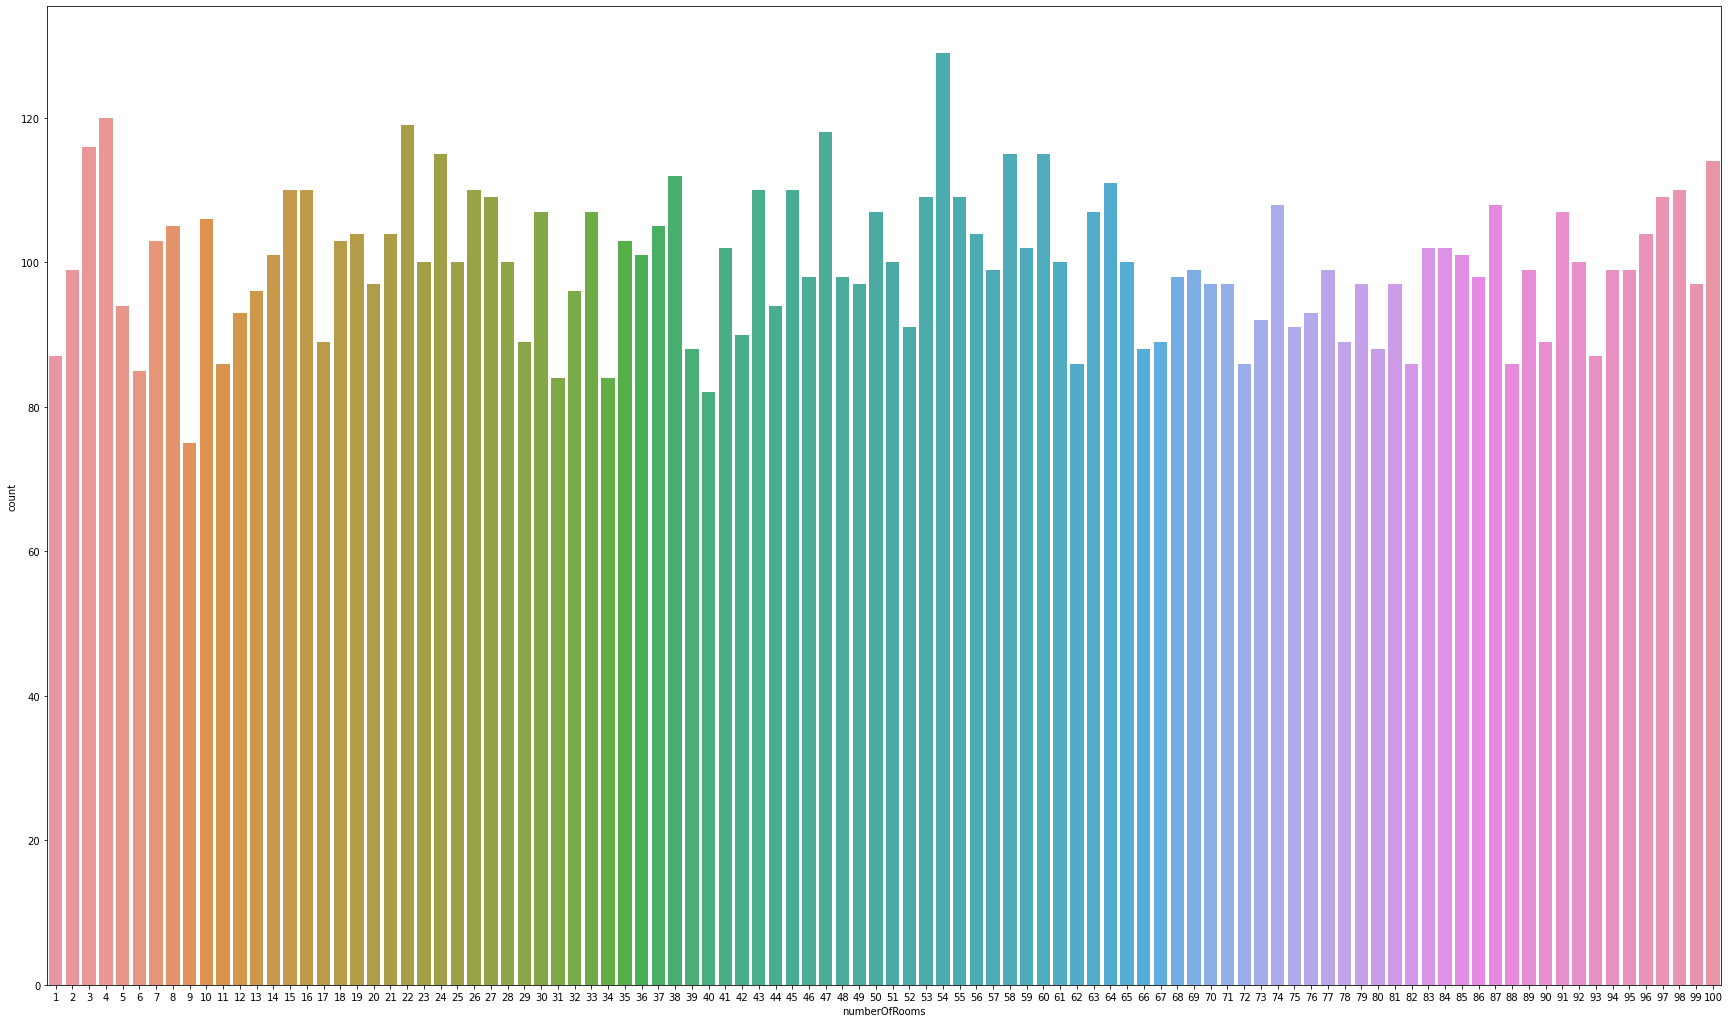

In [12]:
plt.figure(figsize=(30, 18))
sns.countplot( x = dataframe['numberOfRooms'])

In [13]:
dataframe.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,51777,6,1,1,38,66850,7,1,2007,1,0,6619,7721,105,0,8,5186005.7,Luxury
1,24905,99,0,0,49,39297,8,9,1994,0,1,5852,4135,801,0,5,2493994.4,Basic
2,60018,28,1,0,64,42617,4,5,1992,1,1,554,7137,336,1,2,6008211.2,Luxury
3,55529,15,1,1,84,5940,4,3,2008,0,0,6197,7110,931,1,6,5558926.8,Basic
4,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4,Basic


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [15]:
dataframe.duplicated().sum()

0

In [16]:
dataframe.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


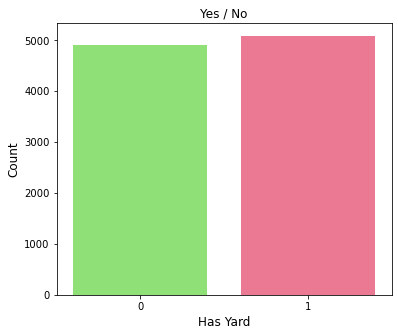

In [17]:
count = dataframe['hasYard'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Has Yard', fontsize=12)
plt.title('Yes / No')
plt.show()

<AxesSubplot:xlabel='hasYard', ylabel='count'>

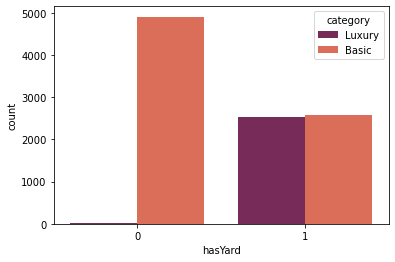

In [18]:
sns.countplot(x = dataframe["hasYard"], hue=dataframe["category"],palette="rocket")

In [19]:
pd.crosstab(dataframe['category'], dataframe['hasYard'], margins=True).style.background_gradient(cmap="PuBuGn")

hasYard,0,1,All
category,,,
Basic,4904,2566,7470
Luxury,9,2521,2530
All,4913,5087,10000


C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


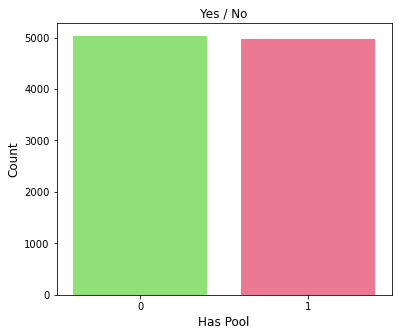

In [20]:
count = dataframe['hasPool'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Has Pool', fontsize=12)
plt.title('Yes / No')
plt.show()

<AxesSubplot:xlabel='hasPool', ylabel='count'>

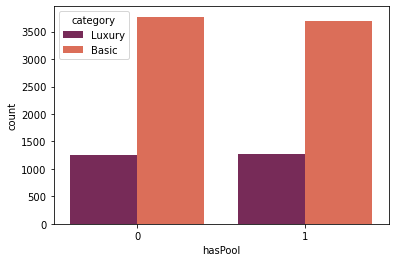

In [21]:
sns.countplot(x = dataframe["hasPool"], hue=dataframe["category"],palette="rocket")

In [22]:
pd.crosstab(dataframe['category'], dataframe['hasPool'], margins=True).style.background_gradient(cmap="PuBuGn")

hasPool,0,1,All
category,,,
Basic,3772,3698,7470
Luxury,1260,1270,2530
All,5032,4968,10000


<AxesSubplot:xlabel='floors', ylabel='count'>

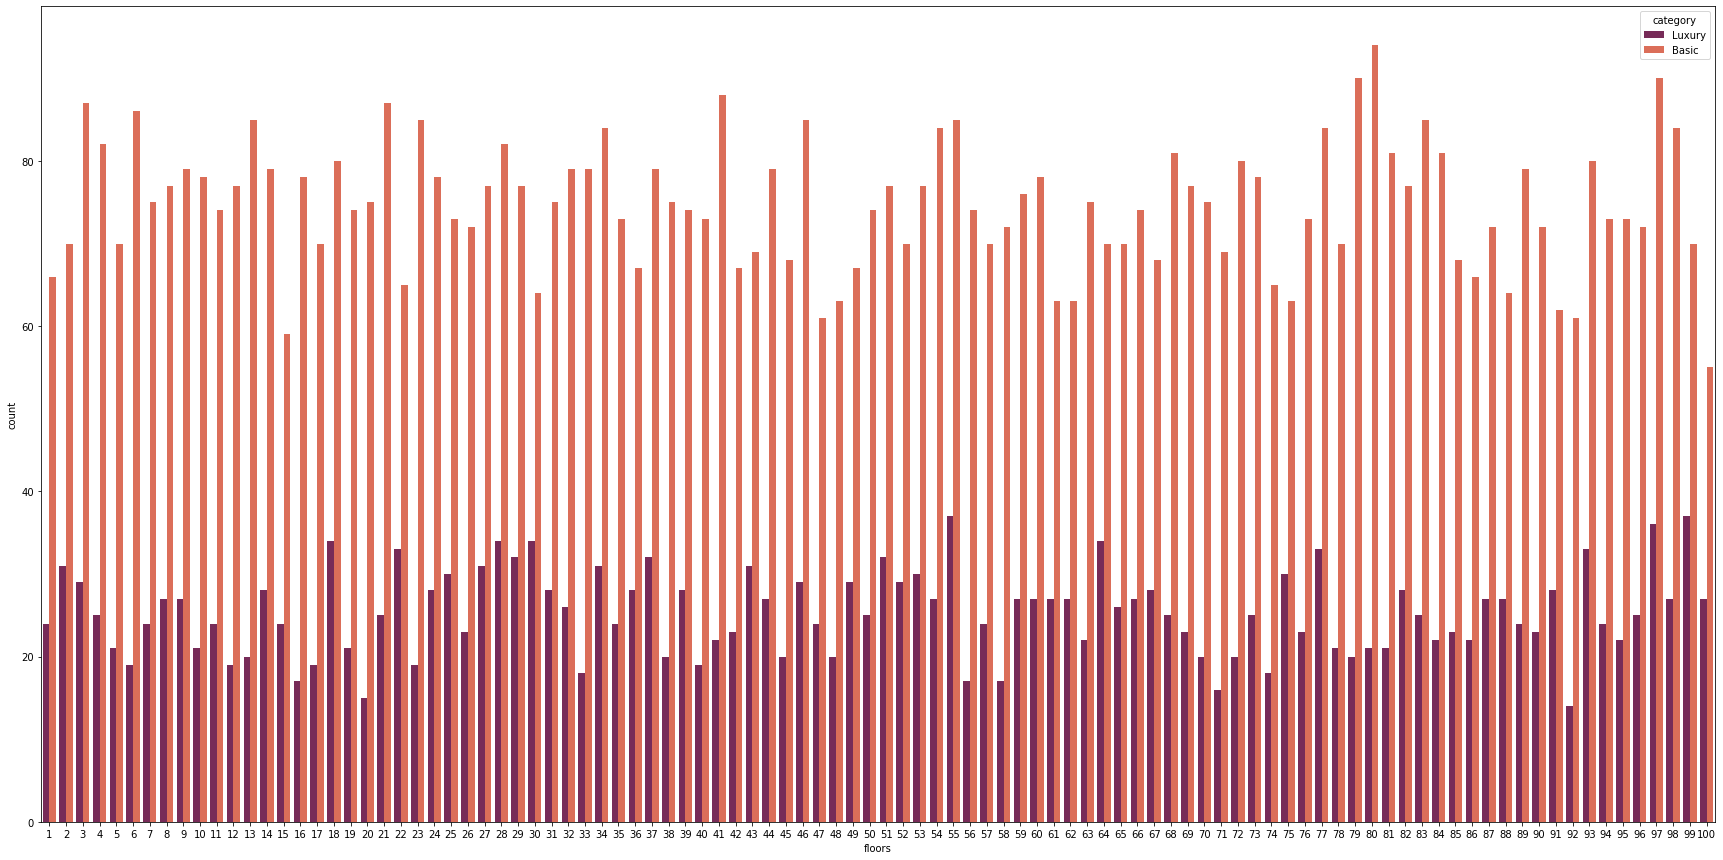

In [23]:
plt.figure(figsize=(30,15))
sns.countplot(x = dataframe["floors"], hue = dataframe["category"],palette = "rocket")

C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


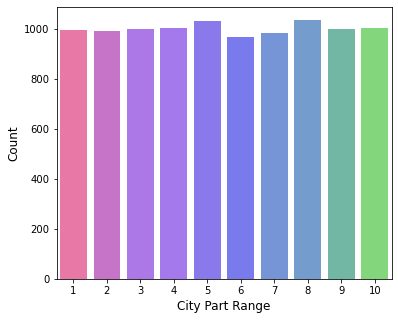

In [24]:
count = dataframe['cityPartRange'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('City Part Range', fontsize=12)
plt.show()

<AxesSubplot:xlabel='cityPartRange', ylabel='count'>

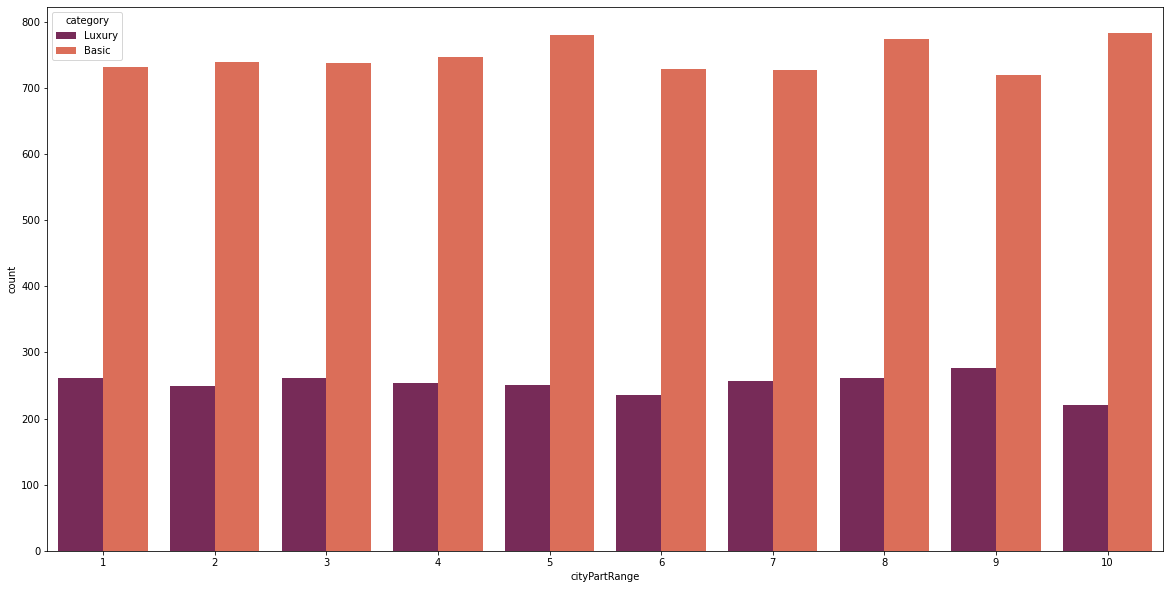

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x = dataframe["cityPartRange"], hue=dataframe["category"],palette="rocket")

In [26]:
pd.crosstab(dataframe['category'], dataframe['cityPartRange'], margins=True).style.background_gradient(cmap="PuBuGn")

cityPartRange,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,732,740,738,747,780,729,727,774,720,783,7470
Luxury,262,250,261,254,251,236,257,261,277,221,2530
All,994,990,999,1001,1031,965,984,1035,997,1004,10000


C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


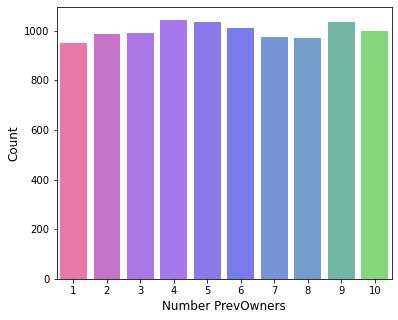

In [27]:
count = dataframe['numPrevOwners'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number PrevOwners', fontsize=12)
plt.show()

<AxesSubplot:xlabel='numPrevOwners', ylabel='count'>

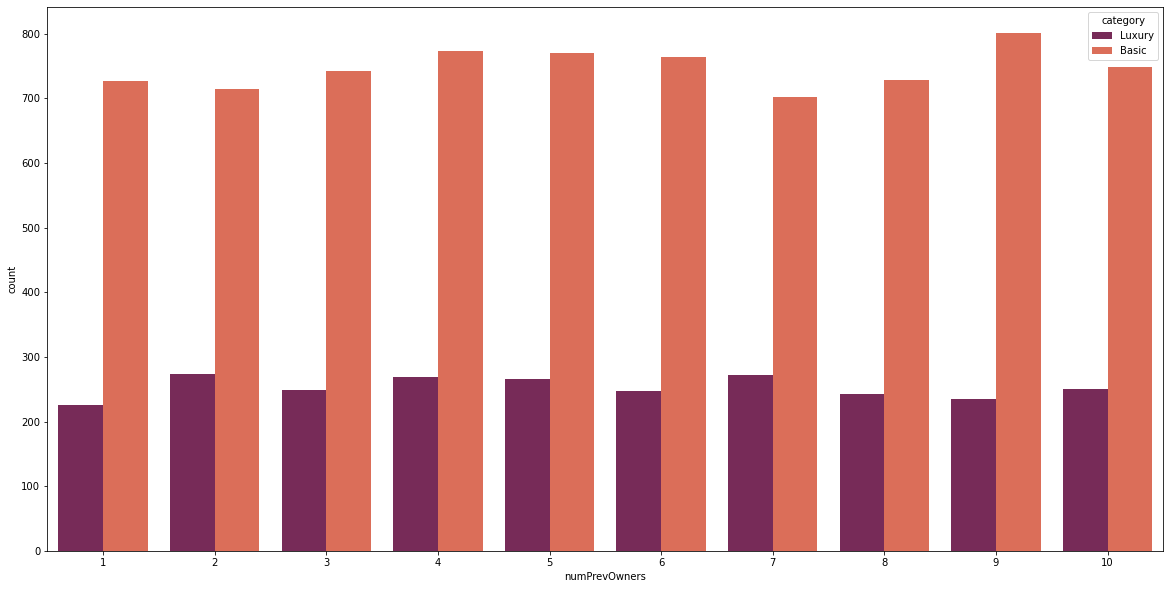

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x = dataframe["numPrevOwners"], hue = dataframe["category"],palette = "rocket")

In [29]:
pd.crosstab(dataframe['category'], dataframe['numPrevOwners'], margins=True).style.background_gradient(cmap="PuBuGn")

numPrevOwners,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,727,714,742,774,770,764,702,728,801,748,7470
Luxury,225,273,249,269,266,247,272,243,235,251,2530
All,952,987,991,1043,1036,1011,974,971,1036,999,10000


C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


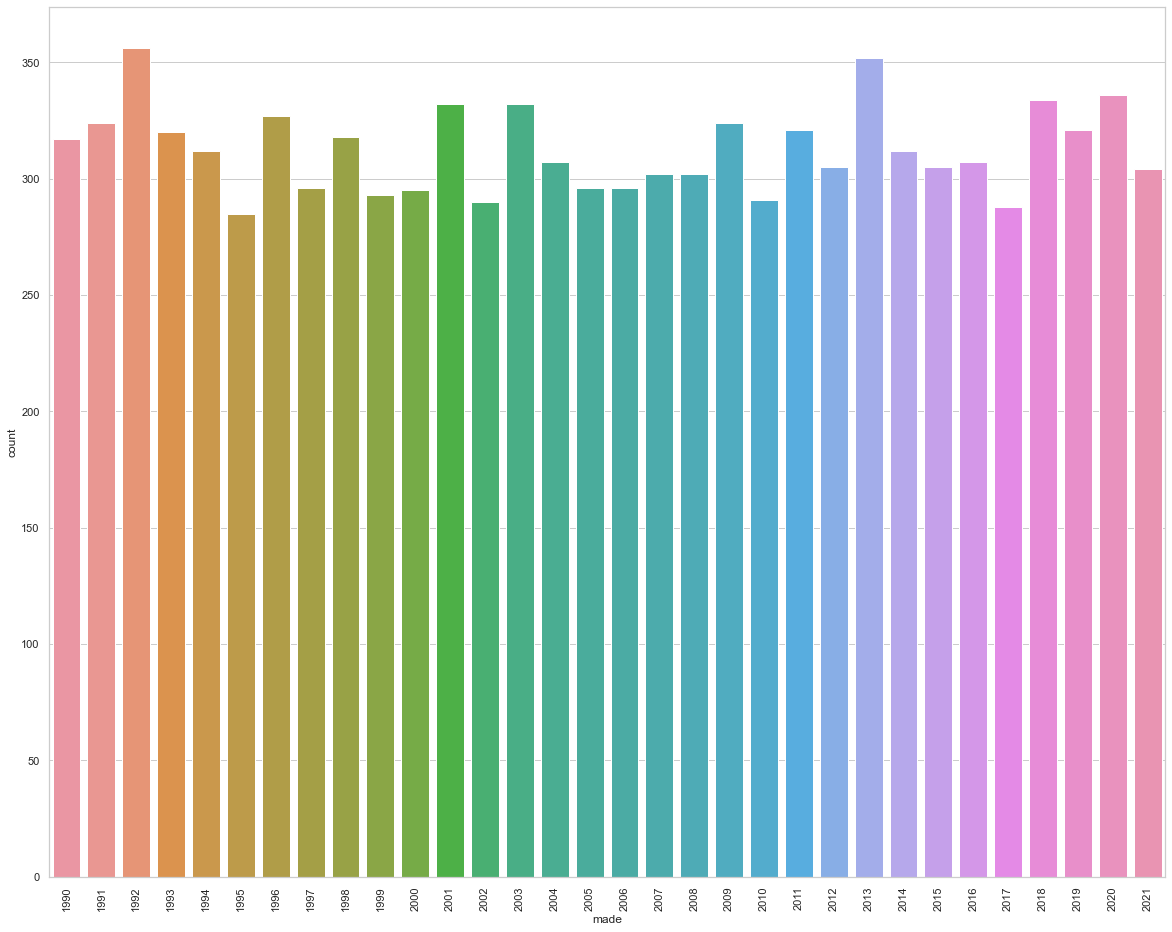

In [30]:
plt.figure(figsize=(20,16))
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 9)
sns.countplot(dataframe['made'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='made', ylabel='count'>

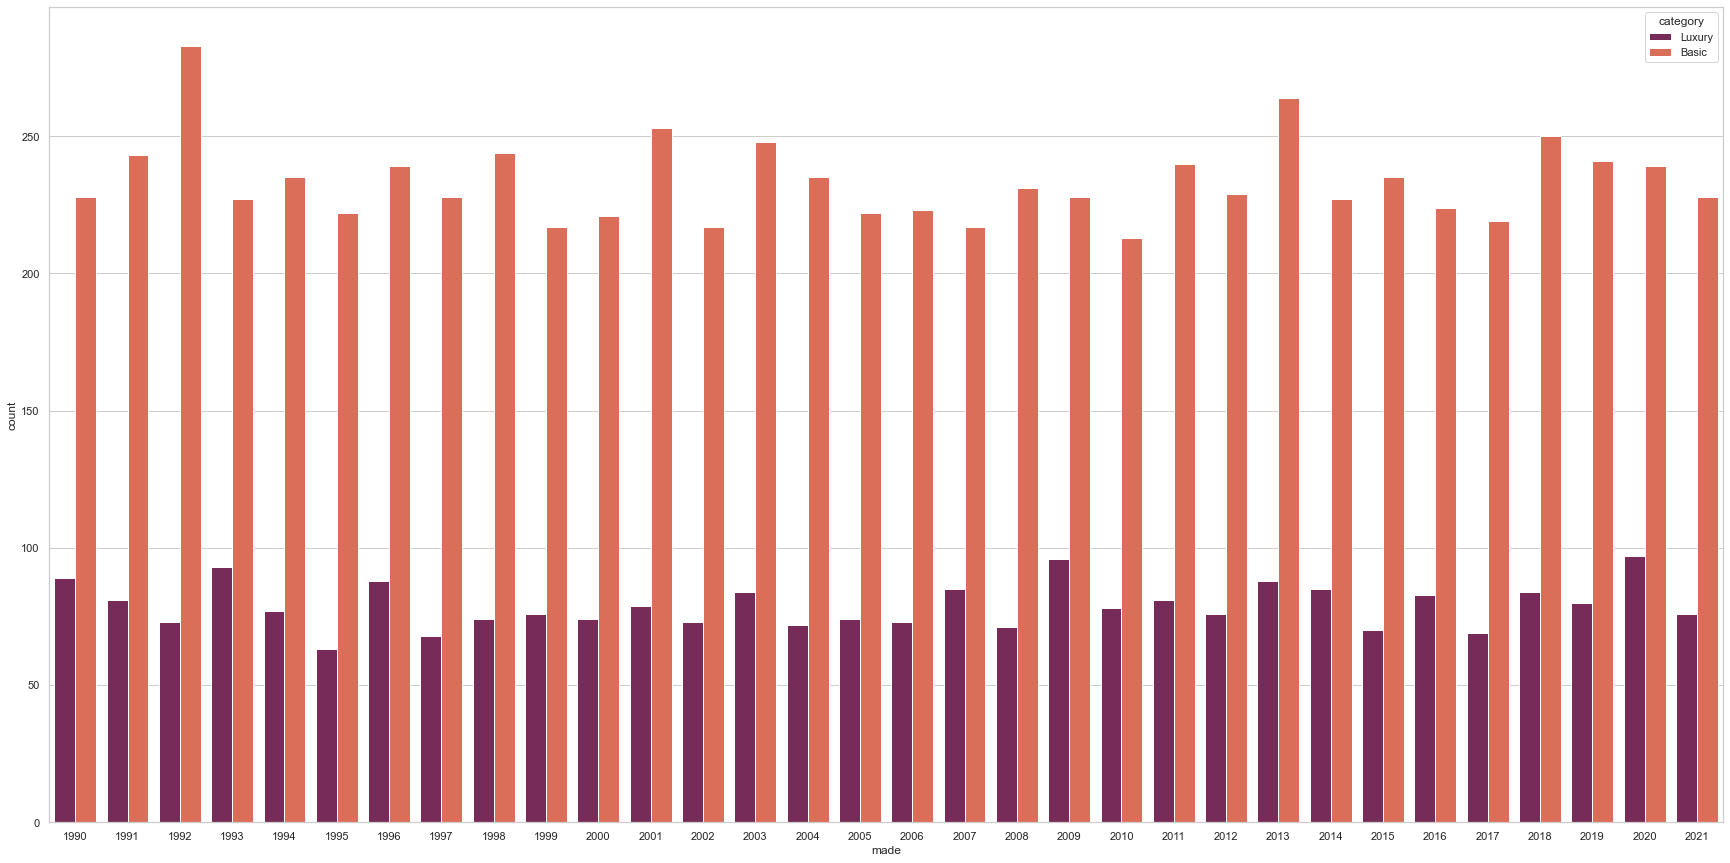

In [31]:
plt.figure(figsize=(30,15))
sns.countplot(x = dataframe["made"], hue=dataframe["category"],palette="rocket")

In [32]:
pd.crosstab(dataframe['category'], dataframe['made'], margins=True).style.background_gradient(cmap="PuBuGn")

made,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Basic,228,243,283,227,235,222,239,228,244,217,221,253,217,248,235,222,223,217,231,228,213,240,229,264,227,235,224,219,250,241,239,228,7470
Luxury,89,81,73,93,77,63,88,68,74,76,74,79,73,84,72,74,73,85,71,96,78,81,76,88,85,70,83,69,84,80,97,76,2530
All,317,324,356,320,312,285,327,296,318,293,295,332,290,332,307,296,296,302,302,324,291,321,305,352,312,305,307,288,334,321,336,304,10000


<AxesSubplot:xlabel='hasStorageRoom', ylabel='count'>

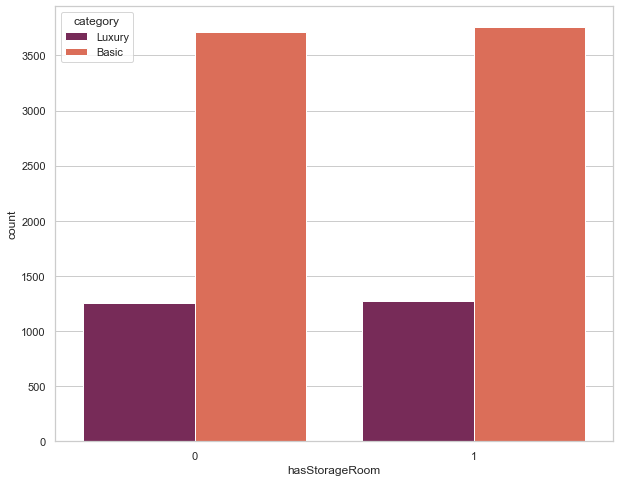

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x = dataframe["hasStorageRoom"], hue=dataframe["category"],palette="rocket")

<AxesSubplot:xlabel='hasGuestRoom', ylabel='count'>

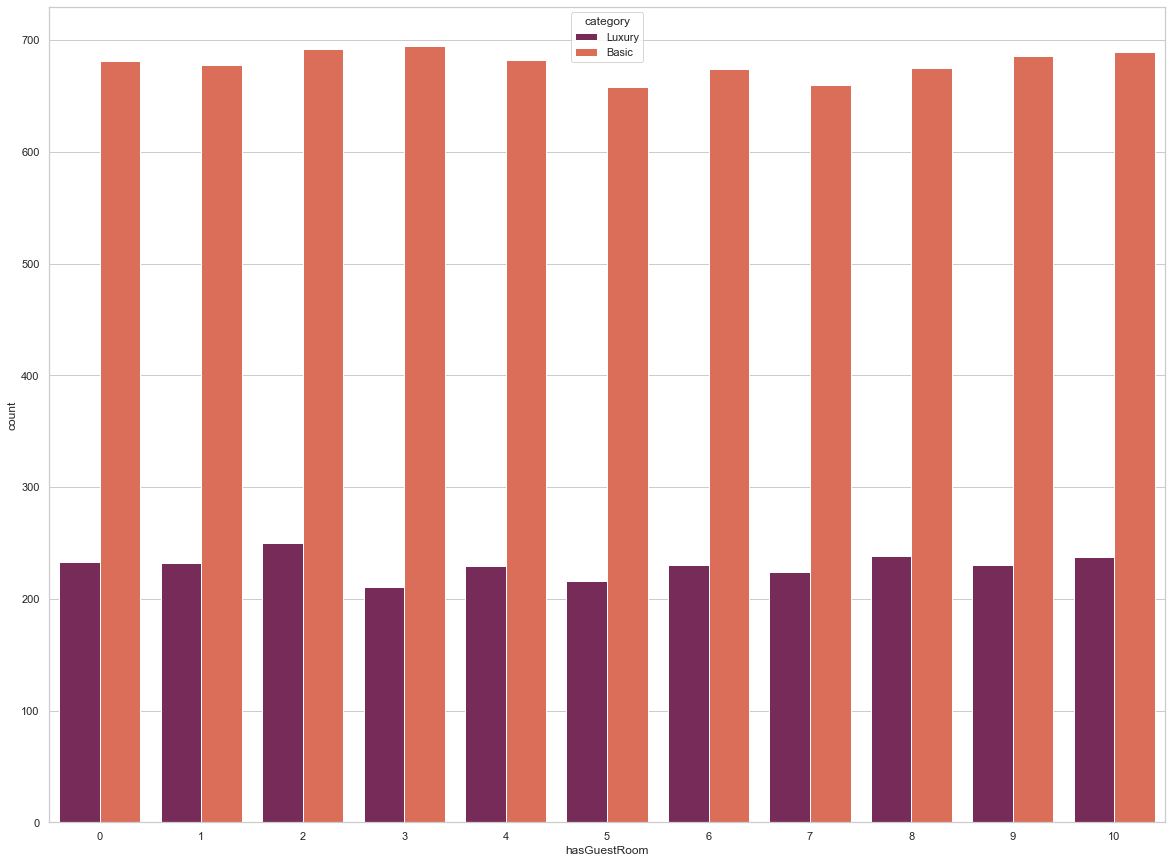

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(x = dataframe["hasGuestRoom"], hue=dataframe["category"],palette="rocket")

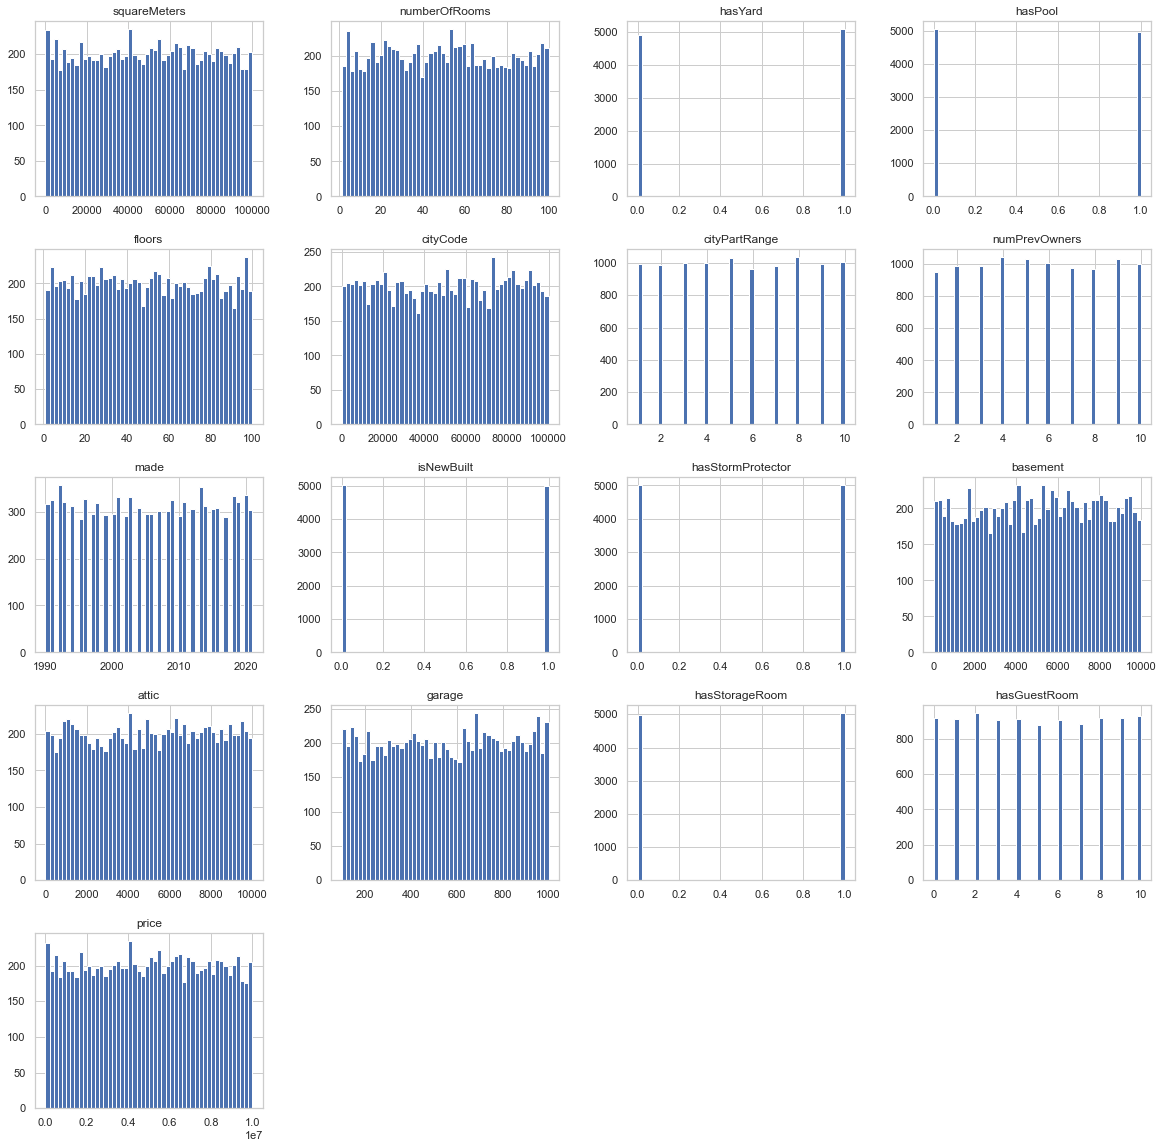

In [35]:
dataframe.hist(bins = 50, figsize = (20,20))
plt.show()

C:\Users\Viplav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


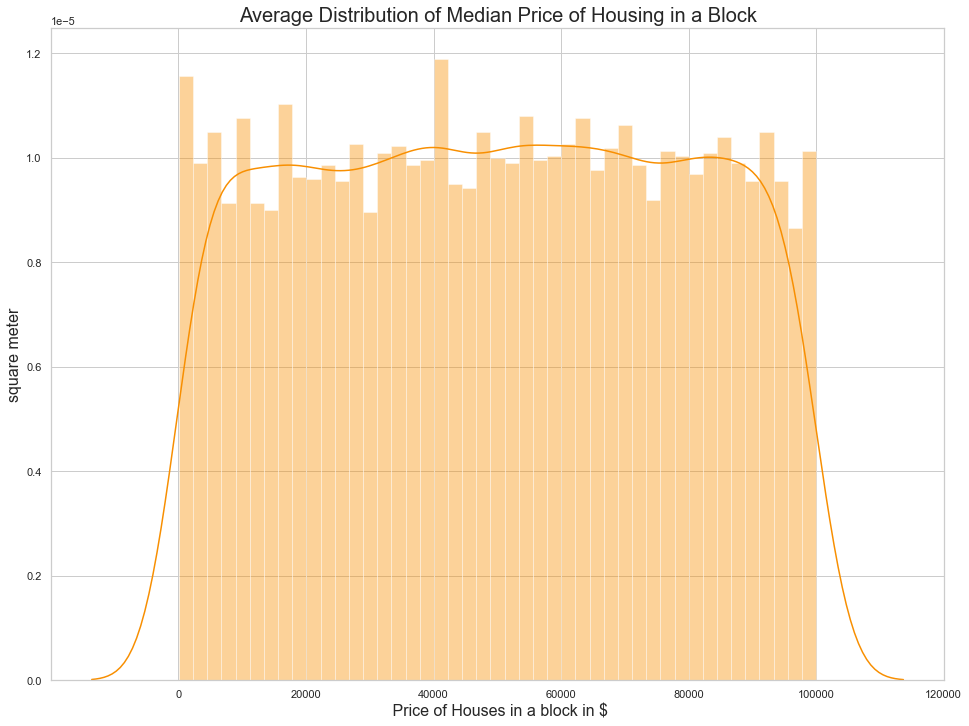

In [36]:
plt.figure(figsize=(16, 12))
sns.distplot(dataframe.squareMeters, bins = 45, color = '#f88f01', hist = True)
plt.xlabel(' Price of Houses in a block in $', fontsize=16)
plt.ylabel('square meter', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=20)
plt.show()

<AxesSubplot:>

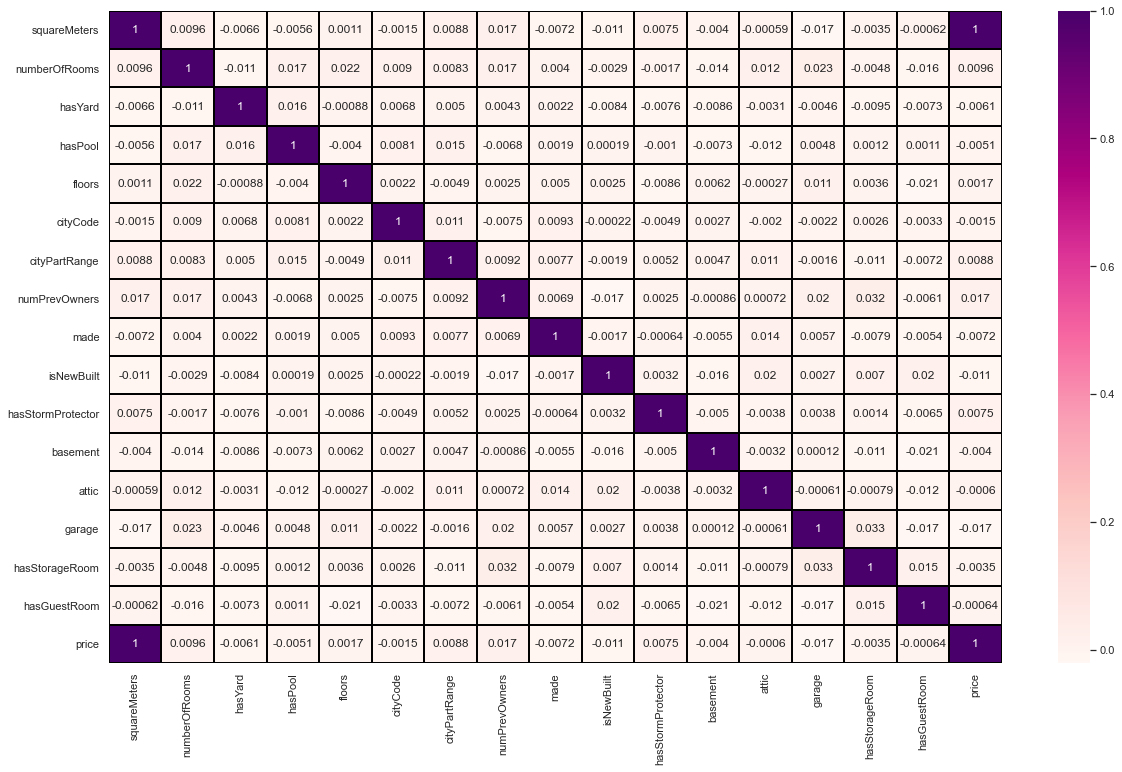

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(dataframe.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')

<AxesSubplot:xlabel='made', ylabel='price'>

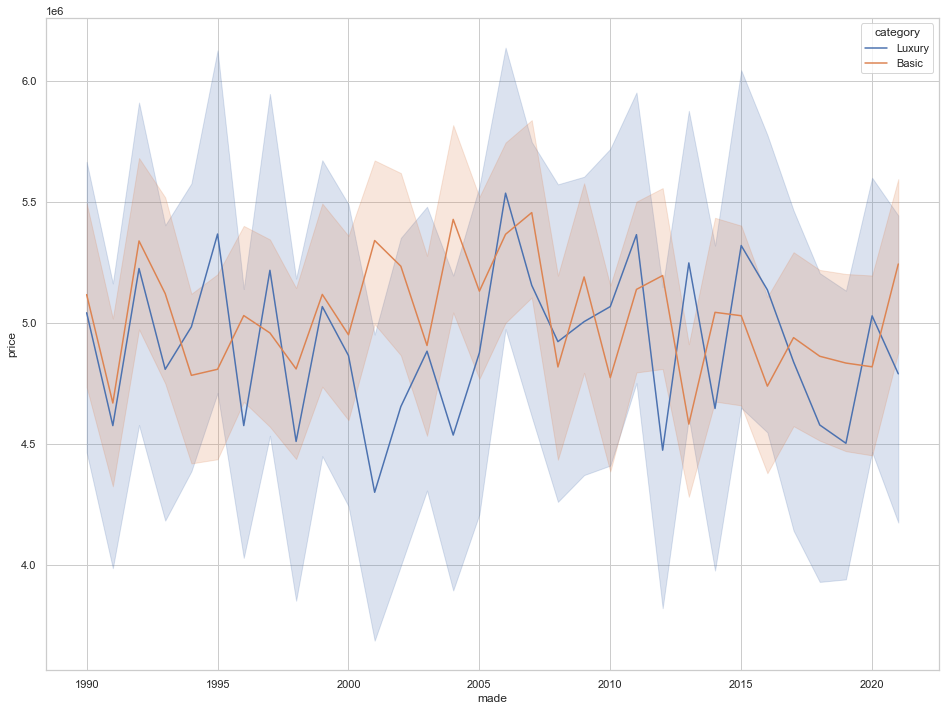

In [38]:
plt.figure(figsize=(16, 12))
sns.lineplot(x = dataframe["made"], y = dataframe["price"] , hue = dataframe["category"])

In [39]:
dataframe['category'].replace("Basic", 0 , inplace = True)
dataframe['category'].replace("Luxury", 1 , inplace = True)

In [40]:
dataframe.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.253000
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.434753
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,1.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


In [41]:
dataframe.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,51777,6,1,1,38,66850,7,1,2007,1,0,6619,7721,105,0,8,5186005.7,1
1,24905,99,0,0,49,39297,8,9,1994,0,1,5852,4135,801,0,5,2493994.4,0
2,60018,28,1,0,64,42617,4,5,1992,1,1,554,7137,336,1,2,6008211.2,1
3,55529,15,1,1,84,5940,4,3,2008,0,0,6197,7110,931,1,6,5558926.8,0
4,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4,0


In [42]:
dataframe['price']/dataframe['squareMeters']

0       100.160413
1       100.140309
2       100.106821
3       100.108534
4       100.098857
           ...    
9995    100.136528
9996    100.256037
9997    100.173772
9998    100.056442
9999    108.491429
Length: 10000, dtype: float64

<AxesSubplot:>

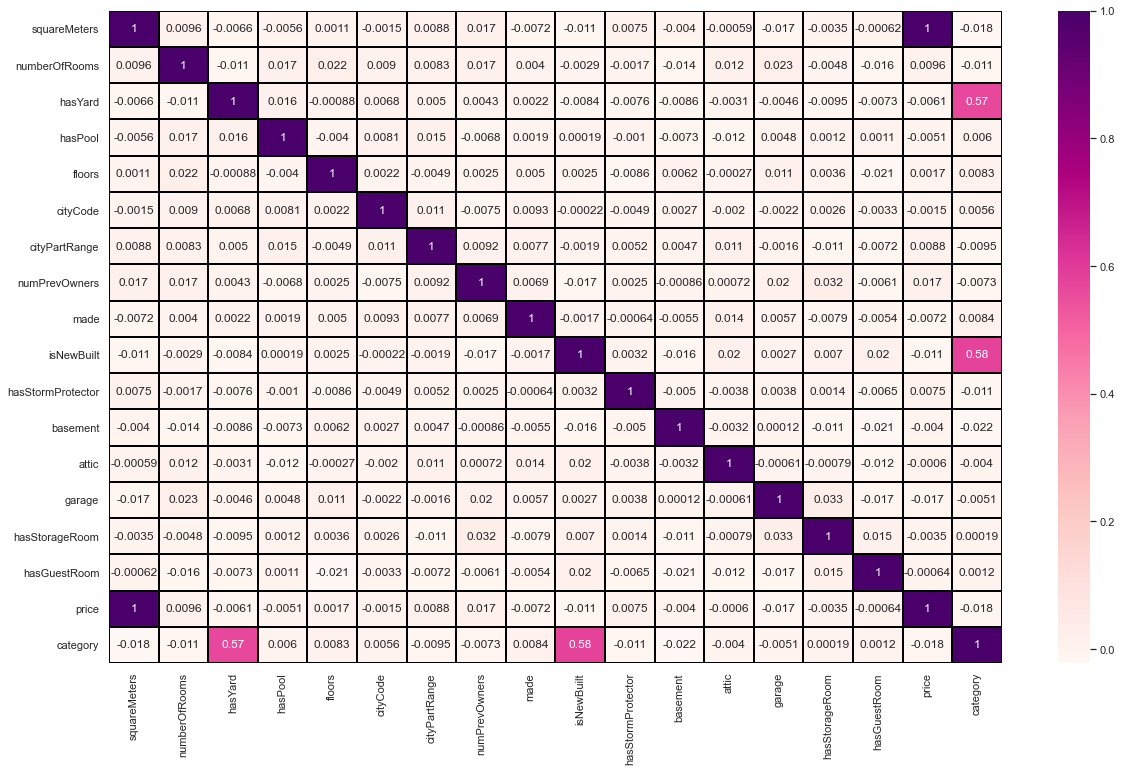

In [43]:
plt.figure(figsize=(20,12))
sns.heatmap(dataframe.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')

In [44]:
dataframe = dataframe.drop(["price"], axis = 1)

In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       10000 non-null  int64
 1   numberOfRooms      10000 non-null  int64
 2   hasYard            10000 non-null  int64
 3   hasPool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   cityCode           10000 non-null  int64
 6   cityPartRange      10000 non-null  int64
 7   numPrevOwners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isNewBuilt         10000 non-null  int64
 10  hasStormProtector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasStorageRoom     10000 non-null  int64
 15  hasGuestRoom       10000 non-null  int64
 16  category           10000 non-null  int64
dtypes: int64(17)


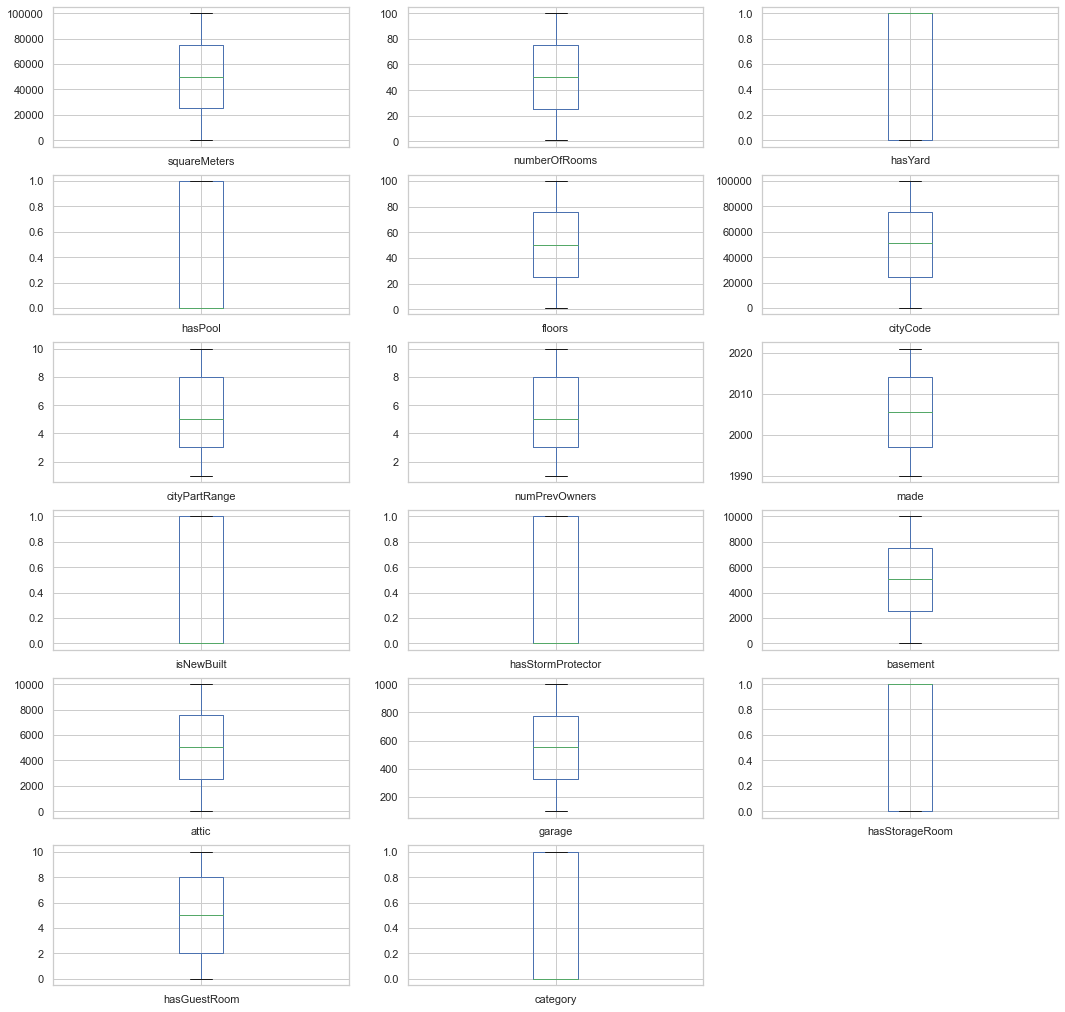

In [46]:
dataframe.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()

In [47]:
luxury = dataframe[dataframe['category']==1]
luxury

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,51777,6,1,1,38,66850,7,1,2007,1,0,6619,7721,105,0,8,1
2,60018,28,1,0,64,42617,4,5,1992,1,1,554,7137,336,1,2,1
5,73542,75,1,1,83,13097,5,9,2021,1,0,3925,8169,417,1,10,1
10,57859,74,1,1,52,25568,8,8,1995,1,0,7881,8141,711,1,1,1
11,23107,81,1,0,54,75314,5,7,1995,1,0,8101,2580,916,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,72836,27,1,0,24,7994,8,8,2009,1,0,8012,2364,526,1,1,1
9989,23118,75,1,1,81,81723,10,2,2012,1,0,8213,2582,479,0,0,1
9993,66959,87,1,0,36,6018,4,8,2010,1,0,2741,1460,294,0,9,1
9994,8130,44,1,1,88,30282,6,7,2014,1,1,7573,8826,978,1,5,1


In [48]:
luxury.shape

(2530, 17)

In [49]:
basic = dataframe[dataframe['category']==0].sample(1265)
basic

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
5046,28121,32,1,1,93,11620,7,6,1991,0,1,1144,1721,857,1,6,0
1347,10606,76,0,1,16,22784,8,9,1996,0,1,6543,1133,957,1,0,0
4888,43547,84,0,1,12,48375,10,1,2016,1,0,5388,327,267,1,2,0
2516,52384,39,0,1,95,54,5,9,2012,0,0,3525,8425,230,1,2,0
6102,68643,71,1,1,2,78777,5,1,2020,0,1,8979,5541,614,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,27969,73,1,1,23,18182,8,9,1994,0,1,5580,3714,686,1,0,0
1182,88838,41,0,0,94,44183,5,3,1993,1,0,3040,8278,499,1,7,0
9168,14859,82,1,1,17,59413,10,6,1992,0,1,636,4915,923,0,9,0
8699,94109,72,0,1,83,91579,8,2,2014,0,0,8095,6127,227,0,1,0


In [50]:
dataframe.drop(['squareMeters'], axis=1, inplace =True)
dataframe

,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,6,1,1,38,66850,7,1,2007,1,0,6619,7721,105,0,8,1
1,99,0,0,49,39297,8,9,1994,0,1,5852,4135,801,0,5,0
2,28,1,0,64,42617,4,5,1992,1,1,554,7137,336,1,2,1
3,15,1,1,84,5940,4,3,2008,0,0,6197,7110,931,1,6,0
4,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,0,1,18,5235,3,2,2014,1,1,927,1553,830,0,8,0
9996,50,1,1,33,30858,3,3,1996,1,1,5942,6266,976,1,1,1
9997,94,0,0,57,66046,8,5,2017,0,1,52,1540,437,1,5,0
9998,75,0,0,34,81773,6,6,2011,0,0,2379,5421,759,1,1,0


# Split test and train data

In [51]:
X =dataframe.drop(['category'], axis = 1).values
y = dataframe['category'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [53]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Decision tree

In [54]:
dt = DecisionTreeClassifier(max_depth = 5, max_features= 7)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

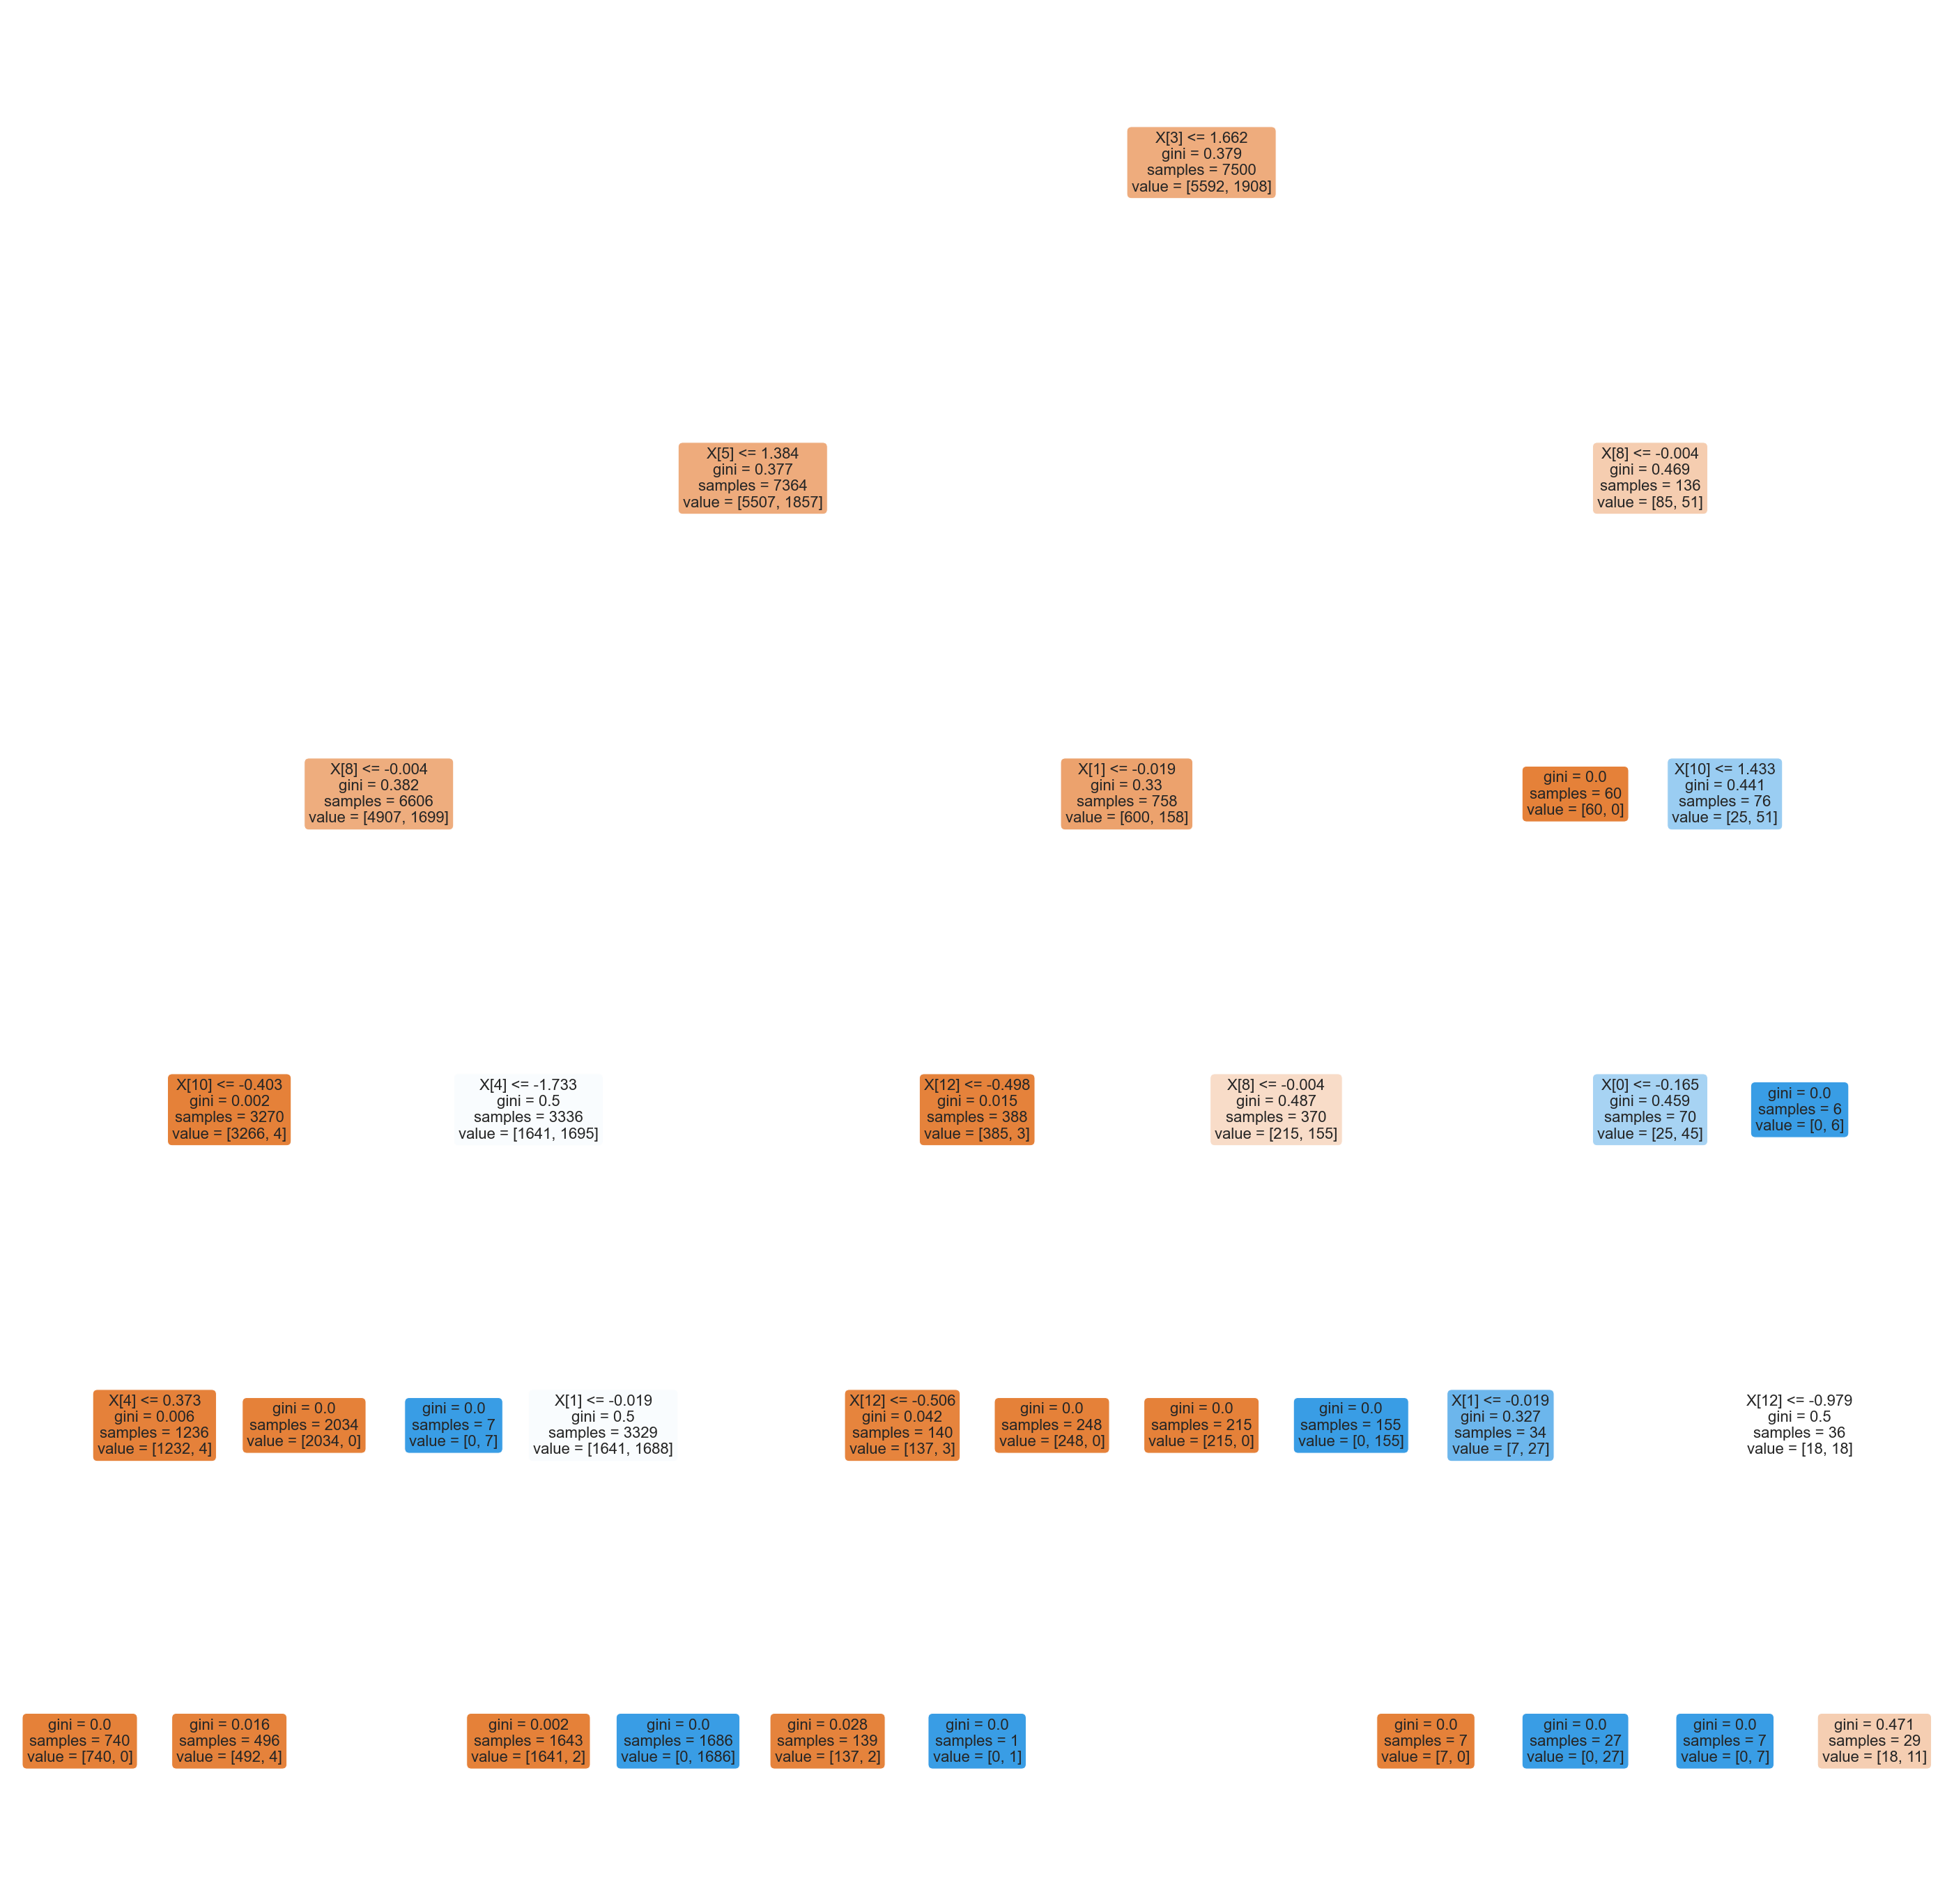

In [55]:
fig = plt.figure(figsize = (50,50))
tree.plot_tree(dt , filled = True , rounded = True )
plt.show()

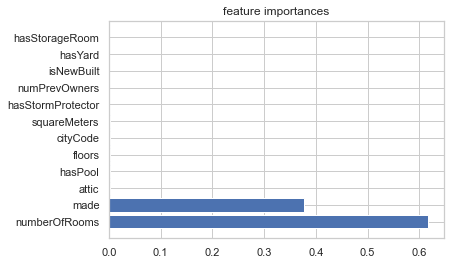

In [56]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price']

f_importances(abs(dt.feature_importances_), features_names, top=12)

In [57]:
print('Decision tree Classifier Report:\n\n{} \n' .format(classification_report(y_test, dt_pred)))

res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

print('Average Accuracy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, dt.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(dt.score( X_test, y_test)*100,2)))

Decision tree Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1878
           1       1.00      0.99      0.99       622

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500
 

Average Accucy: 	0.9420

Standard Deviation: 	0.0834

Confusion Matrix :
[[1877    1]
 [   9  613]]

Accuracy Score :		99.6%


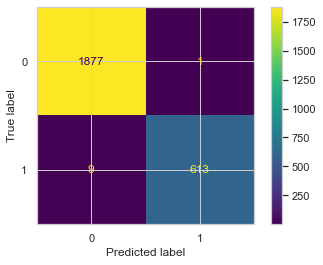

In [58]:
plot_confusion_matrix(dt, X_test, y_test)

# Random Forest Classifier

In [59]:
rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [60]:
rf_pred = rf.predict(X_test)

In [61]:
print('Random Forest Classifier report:\n\n{} \n' .format(classification_report(y_test, rf_pred)))

res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, rf.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(rf.score( X_test, y_test)*100,2)))

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1878
           1       1.00      1.00      1.00       622

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500
 

Average Accucy: 	0.9988

Standard Deviation: 	0.0018

Confusion Matrix :
[[1878    0]
 [   3  619]]

Accuracy Score :		99.88%


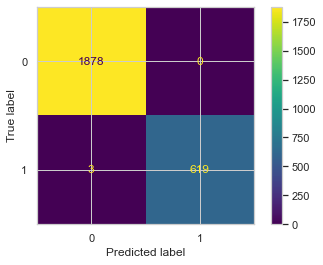

In [62]:
plot_confusion_matrix(rf, X_test, y_test)

In [63]:
print ('Train Accuracy - : {}%'.format(round(rf.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(rf.score( X_test, y_test)*100,2)))

Train Accuracy - : 100.0%
Test Accuracy - : 99.88%


# K-Nearest Neighbors

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
kn_pred = knn.predict(X_test)

In [66]:
print('KNN Classifier:\n ')
print('TEST RESULT:\n ')

print(classification_report(y_test, kn_pred))

res = cross_val_score(knn, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, knn.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(knn.score( X_test, y_test)*100,2)))

KNN Classifier:
 
TEST RESULT:
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1878
           1       1.00      0.99      0.99       622

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500

Average Accucy: 	0.9888

Standard Deviation: 	0.0059

Confusion Matrix :
[[1877    1]
 [   9  613]]

Accuracy Score :		99.6%


In [67]:
print ('Train Accuracy - : {}%'.format(round(knn.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(knn.score( X_test, y_test)*100,2)))

Train Accuracy - : 99.84%
Test Accuracy - : 99.6%


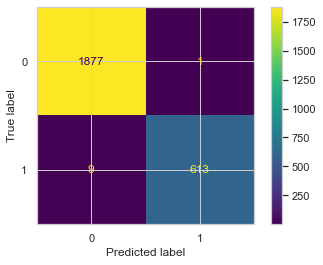

In [68]:
plot_confusion_matrix(knn, X_test, y_test)

In [69]:
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))

for i, k in enumerate(n_neighbors):

 knn = KNeighborsClassifier(k)
 knn.fit(X_train, y_train)
 train_accuracy[i] = knn.score(X_train,y_train)
 test_accuracy[i] = knn.score(X_test, y_test)

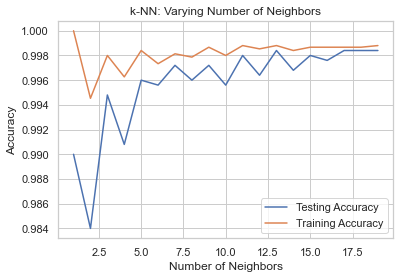

In [70]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [71]:
f1_score=accuracy_score
dt_f1 =f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, kn_pred)

RF_f1 = f1_score(y_test, rf_pred)

In [72]:
x=['Decision Tree','KNN','Random Forest']
y=[dt_f1,knn_f1,RF_f1]

<Figure size 1440x1440 with 0 Axes>

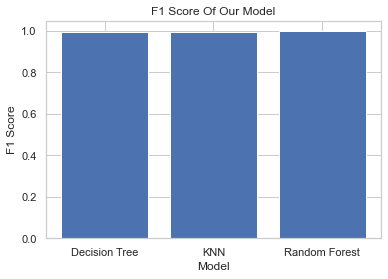

In [73]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(x, y, width=0.8)
plt.title('F1 Score Of Our Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

# ROC Curve

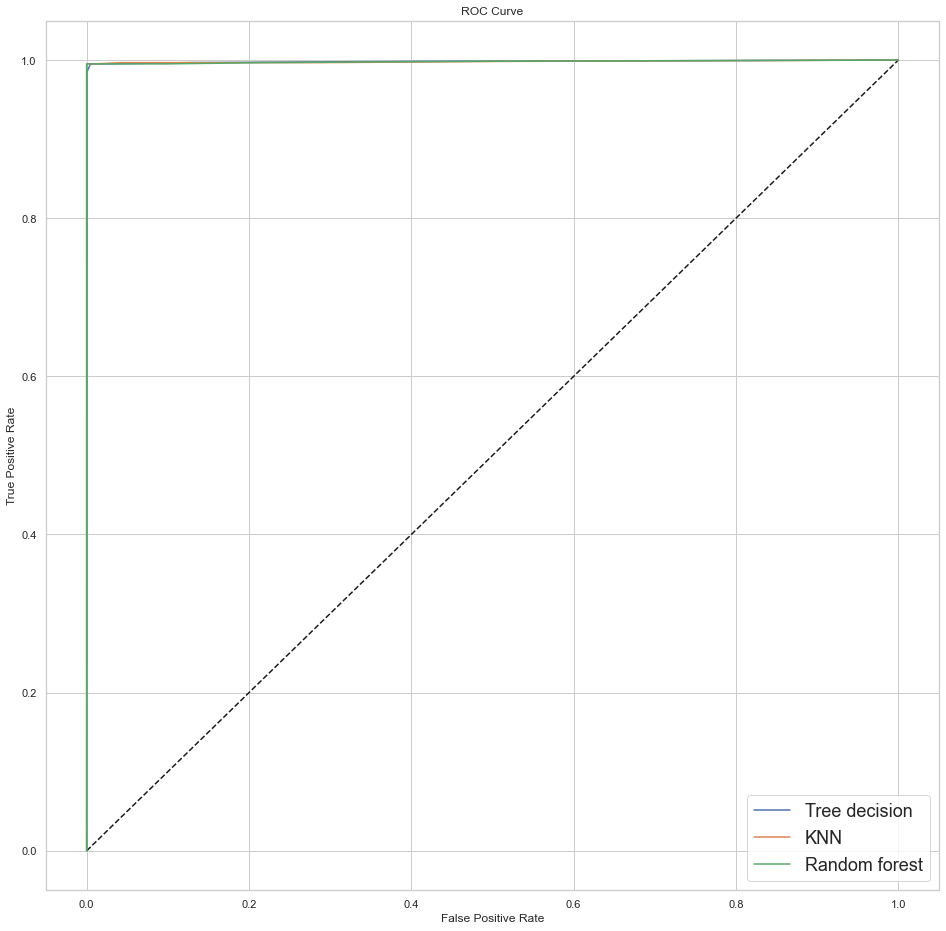

In [74]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

pred_prob = [y_pred_prob_dt,y_pred_prob_knn,y_pred_prob_rf]

# Generate ROC curve values: fpr, tpr, thresholds

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_dt)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_prob_knn)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(16,16))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label = 'Tree decision')
plt.plot(fpr_2, tpr_2, label = 'KNN')
plt.plot(fpr_3, tpr_3, label = 'Random forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')

plt.show()